In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Importación de data

In [2]:
df = pd.read_excel(r'C:\Users\pepaq\Documents\Data Science\Hackaton Enaex_201908\BaseDatosHistorica_Tronadura_Hackathon.xlsx', skiprows=2)

In [3]:
df.shape #base con 2000 registros app, 24 variables

(2002, 24)

In [4]:
df.columns

Index(['Fase', 'Banco', 'Tipo de tronadura', 'Tipo Material', 'M',
       'Dominio Estructural', 'Diámetro', 'BxS', 'Tiempo entre Pozos Filas ms',
       'Fc', 'Tipo Explosivo', 'P10', 'P20', 'P30', 'P40', 'P50', 'P60', 'P70',
       'P80', 'P90', 'P100', 'Este', 'Norte', 'Cota'],
      dtype='object')

In [5]:
df.dtypes

Fase                            object
Banco                          float64
Tipo de tronadura               object
Tipo Material                   object
M                               object
Dominio Estructural             object
Diámetro                       float64
BxS                             object
Tiempo entre Pozos Filas ms     object
Fc                             float64
Tipo Explosivo                  object
P10                            float64
P20                             object
P30                             object
P40                            float64
P50                             object
P60                            float64
P70                             object
P80                            float64
P90                            float64
P100                           float64
Este                            object
Norte                           object
Cota                           float64
dtype: object

In [6]:
df.describe() #no muy útil porque son variables categóricas

,Banco,Diámetro,Fc,P10,P40,P60,P80,P90,P100,Cota
count,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1955.000000
mean,3145.892857,12.018048,358.927041,0.520009,1.850942,3.191641,5.067537,6.608904,10.739809,3148.475888
std,281.549700,0.621629,161.166319,0.289888,0.736276,0.810405,0.973723,1.396228,3.001368,289.625835
min,2810.000000,7.875000,104.000000,0.039764,0.157480,0.830000,2.952758,3.543309,4.881892,1945.000000
25%,2900.000000,12.250000,178.000000,0.310000,1.338583,2.560000,4.015750,5.314964,8.620000,2900.000000
50%,2960.000000,12.250000,452.000000,0.510000,1.732284,3.188978,5.433074,6.811027,10.332483,2960.000000
75%,3443.750000,12.250000,500.000000,0.708662,2.322836,3.818900,5.826775,7.637799,12.598824,3455.000000
max,3875.000000,12.250000,673.000000,2.440946,4.094490,5.472444,8.425201,12.010000,24.800000,5885.000000


In [7]:
df.isnull().sum() #se detectan missing values

Fase                           42
Banco                          42
Tipo de tronadura              42
Tipo Material                  42
M                              42
Dominio Estructural            42
Diámetro                       42
BxS                            42
Tiempo entre Pozos Filas ms    43
Fc                             42
Tipo Explosivo                 42
P10                            42
P20                            42
P30                            42
P40                            42
P50                            42
P60                            42
P70                            42
P80                            42
P90                            42
P100                           42
Este                           47
Norte                          47
Cota                           47
dtype: int64

In [8]:
#eliminar nans para graficar; queda pendiente decidir si se pueden imputar variables o no
df = df.dropna()

## Análisis por variable

Variable objetivo: P80

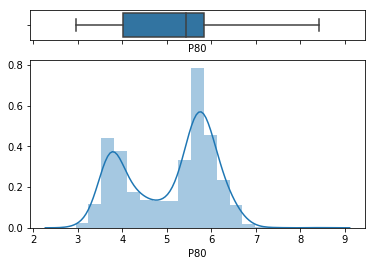

In [9]:
#Histograma
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df['P80'], ax=ax_box)
sns.distplot(df['P80'], ax=ax_hist)


1. Fase: Sectorización de la mina

La mayoría de los registros se ubican en Stage 4 y 2, los otros no dicen mucho, se debe determinar su relevancia al modelo; existe una tendencia, al igual que P80, de concentrarse en dos grupos

In [10]:
df['Fase'].value_counts()  

Stage 4    1117
Stage 2     753
Stage 6      41
Stage 1      31
Stage 3       9
Stage 5       3
Name: Fase, dtype: int64

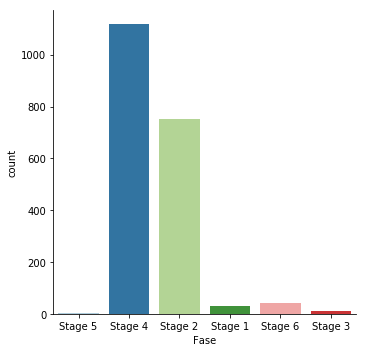

In [12]:
sns.catplot(x='Fase', kind="count", palette="Paired", data=df)

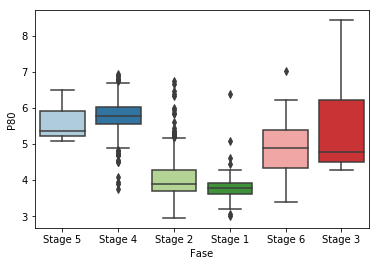

In [13]:
sns.boxplot( x=df['Fase'], y=df['P80'], palette="Paired")

In [39]:
#variables dummy para determinar correlación con las otras variables
df['Stage 1'] = (df['Fase'] == 'Stage 1').astype(int)
df['Stage 2'] = (df['Fase'] == 'Stage 2').astype(int)
df['Stage 3'] = (df['Fase'] == 'Stage 3').astype(int)
df['Stage 4'] = (df['Fase'] == 'Stage 4').astype(int)
df['Stage 5'] = (df['Fase'] == 'Stage 5').astype(int)
df['Stage 6'] = (df['Fase'] == 'Stage 6').astype(int)

2. Banco: Altura de la tronadura:

La variable está bastante concentrada en dos grupos de valores, podría categorizarse si se incluye en el modelo; se repite la tendencia de 2 grupos de la variable Fase

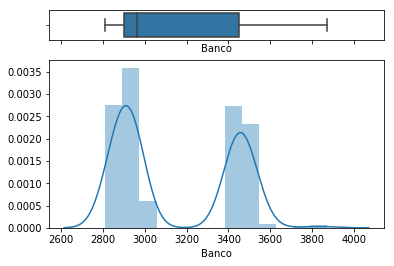

In [15]:
#Histograma
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df['Banco'], ax=ax_box)
sns.distplot(df['Banco'], ax=ax_hist)

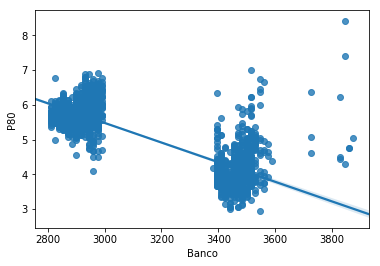

In [16]:
sns.regplot(x=df['Banco'], y=df['P80'])

3. Tipo de Tronadura: De acuerdo al propósito

Los registros son en su mayoría con tronadura 2; tronadura 1 es mucho más dispersa, en qué contexto se usa?

In [17]:
df['Tipo de tronadura'].value_counts()  

Tronadura 2    1683
Tronadura 1     271
Name: Tipo de tronadura, dtype: int64

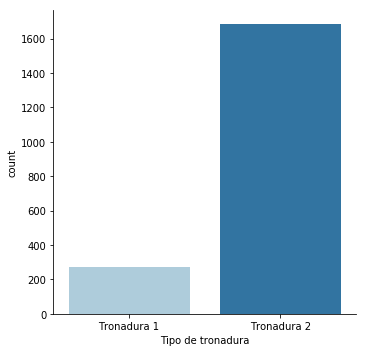

In [18]:
sns.catplot(x='Tipo de tronadura', kind="count", palette="Paired", data=df)

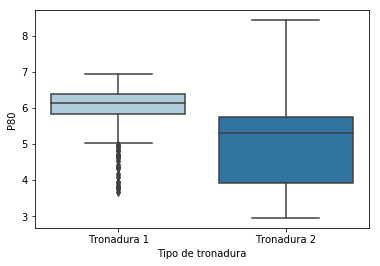

In [19]:
sns.boxplot( x=df['Tipo de tronadura'], y=df['P80'], palette="Paired")

In [41]:
#variables dummy para determinar correlación con las otras variables mediante test chi cuadrado
df['Tronadura 1'] = (df['Tipo de tronadura'] == 'Tronadura 1').astype(int)
df['Tronadura 2'] = (df['Tipo de tronadura'] == 'Tronadura 2').astype(int)

4. Tipo de Material: Mineral o lastre

P80 varia bastante dependiendo del tipo de material

In [23]:
df['Tipo Material'].value_counts()  

Roca 1     1100
Roca 2      811
Lastre       42
Relleno       1
Name: Tipo Material, dtype: int64

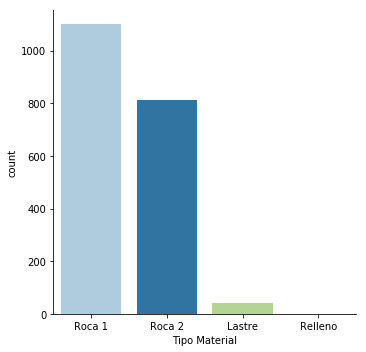

In [24]:
sns.catplot(x='Tipo Material', kind="count", palette="Paired", data=df)

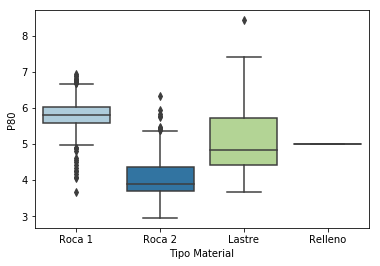

In [25]:
sns.boxplot( x=df['Tipo Material'], y=df['P80'], palette="Paired")

5. M: Clasificación geotécnica del macizo rocoso

L4 es el más abundante y concentra el valor de P80 en un rango definido

In [27]:
df['M'].value_counts()  

L4    1078
L1     490
L8     264
L2      74
L3      31
L7      17
Name: M, dtype: int64

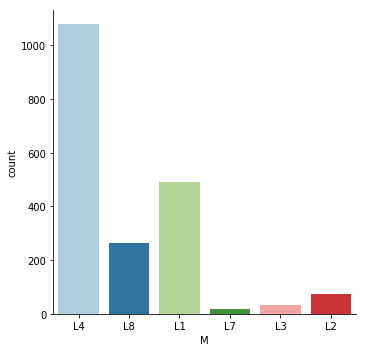

In [28]:
sns.catplot(x='M', kind="count", palette="Paired", data=df)

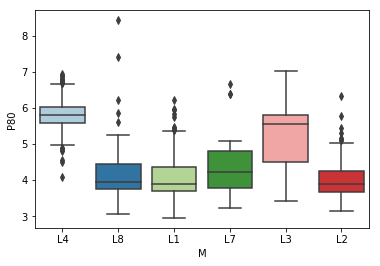

In [29]:
sns.boxplot( x=df['M'], y=df['P80'], palette="Paired")

6. Dominio Estructural: Ubicación de donde se va a tronar (zona)

Mayoría al norte, noreste

In [30]:
df['Dominio Estructural'].value_counts()  

Norte       1222
Noreste      636
Sureste       73
Noroeste      22
Este           1
Name: Dominio Estructural, dtype: int64

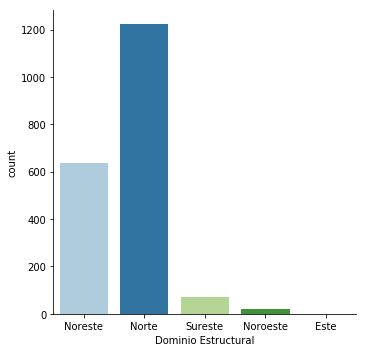

In [31]:
sns.catplot(x='Dominio Estructural', kind="count", palette="Paired", data=df)

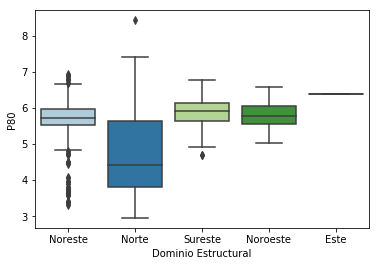

In [32]:
sns.boxplot( x=df['Dominio Estructural'], y=df['P80'], palette="Paired")

Nota: Se descubre que existe una importante tendencia correlacionada con el comportamiento de P80; las variables que se han analizado,
también se concentran en dos grupos; esto indicaría que no todas son relevantes al modelo ya que entregan comportamientos similares;
Es necesario generar una matriz de correlación y realizar el test chi cuadrado entre las variables a considerar